# Init

In [3]:
import sys

# This allows you to run on Colaboratory and load files from your Google Drive
try:
    from google.colab import drive
    drive.mount("/content/drive")
    main_path = '/content/drive/My Drive/'
except:
    main_path = ''
sys.path.append(main_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!pip install mplhep
import mplhep as hep  # need reload IDE for success
hep.style.use('ATLAS')  # or ATLAS/LHCb2

In [2]:
!pip install uproot3
!pip install hist

import uproot3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import hist

     |████████████████████████████████| 117 kB 16.8 MB/s 
     |████████████████████████████████| 87 kB 6.2 MB/s 
     |████████████████████████████████| 1.4 MB 39.5 MB/s 


In [4]:
def default_flatname(branchname, fieldname, index):
    """This replaces the dot in the column names with underscores"""
    out = branchname.replace(".", "_")
    if not isinstance(branchname, str):
        out = branchname.decode("utf-8")
    if fieldname is not None:
        fieldname.replace(".", "_")
        out += "_" + fieldname
    if index != ():
        out += "[" + "][".join(str(x) for x in index) + "]"
    return out

# Load data

In [7]:
f5pct219 = uproot3.open("drive/MyDrive/root_files_dzhadan/ord_geom_less.root")
f5pct231 = uproot3.open("drive/MyDrive/root_files_dzhadan/ord_geom_231.root")
f5pct235 = uproot3.open("drive/MyDrive/root_files_dzhadan/ord_geom_more_stat.root")
f5pct242 = uproot3.open("drive/MyDrive/root_files_dzhadan/ord_geom_more.root")

In [8]:
df5pct219 = f5pct219["HitDumper/nt"].pandas.df(['hits'], flatname=default_flatname, flatten=True)
df5pct231 = f5pct231["HitDumper/nt"].pandas.df(['hits'], flatname=default_flatname, flatten=True)
df5pct235 = f5pct235["HitDumper/nt"].pandas.df(['hits'], flatname=default_flatname, flatten=True)
df5pct242 = f5pct242["HitDumper/nt"].pandas.df(['hits'], flatname=default_flatname, flatten=True)

In [13]:
all_cats = []
tresholds = [250, 500, 1000, 1500, 2000]
for treshold in tresholds:
    for df in ["5pct219", "5pct231", "5pct235", "5pct242"]:
        all_cats.append("%s_%s" % (df, treshold))

In [15]:
h = hist.Hist(
    hist.axis.StrCategory(all_cats, name="cat"),
    hist.axis.Regular(30, 0, 3000, name="x"),
    hist.storage.Weight(),
)

In [16]:
for treshold in tresholds:
    h.fill(cat="5pct219_%s" % treshold, x=df5pct219.query("hits_ek > %s & hits_pdgId == 2112" % treshold)["hits_ek"].to_numpy())
    h.fill(cat="5pct231_%s" % treshold, x=df5pct231.query("hits_ek > %s & hits_pdgId == 2112" % treshold)["hits_ek"].to_numpy())
    h.fill(cat="5pct235_%s" % treshold, x=df5pct235.query("hits_ek > %s & hits_pdgId == 2112" % treshold)["hits_ek"].to_numpy())
    h.fill(cat="5pct242_%s" % treshold, x=df5pct242.query("hits_ek > %s & hits_pdgId == 2112" % treshold)["hits_ek"].to_numpy())

# Ratio plots

Sum af bins

Text(1, 0, 'Concrete density')

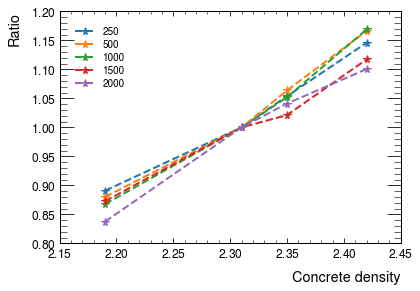

In [22]:
x = [2.19, 2.31, 2.35, 2.42 ]
for treshold in tresholds:
    A = "5pct219_%s" % treshold
    B = "5pct231_%s" % treshold
    C = "5pct235_%s" % treshold
    D = "5pct242_%s" % treshold
    y = [sum(h[B,:].counts())/sum(h[A ,:].counts()), 1, sum(h[B,:].counts())/sum(h[C,:].counts()), sum(h[B,:].counts())/sum(h[D,:].counts())]
    # plt.figure()
    plt.plot(x,y, "*--", label="%s" % treshold)
plt.legend()
plt.ylabel("Ratio")
plt.xlabel("Concrete density")

bin alone for treshold = 250

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


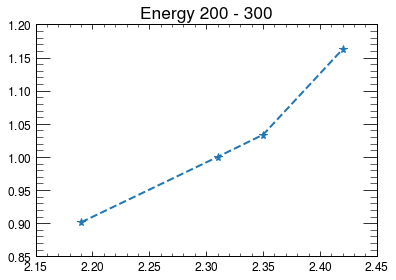

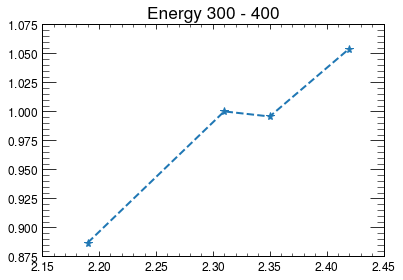

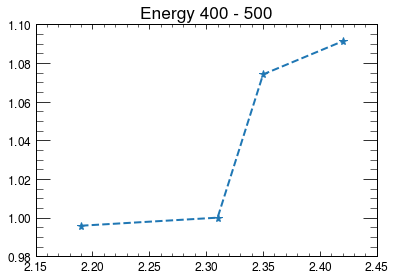

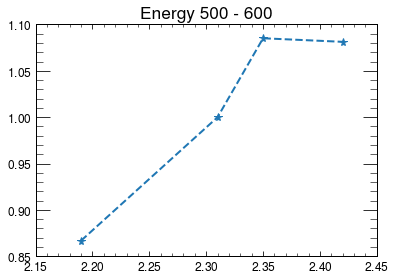

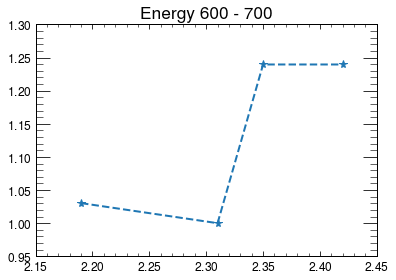

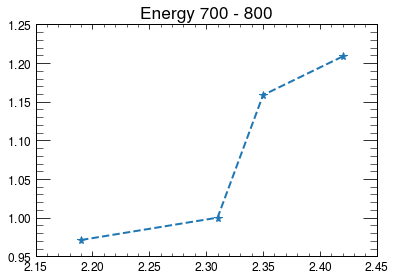

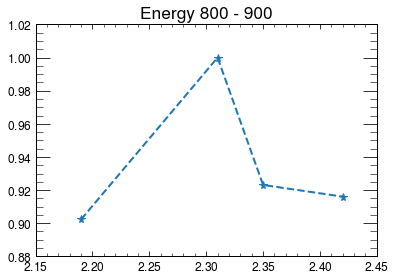

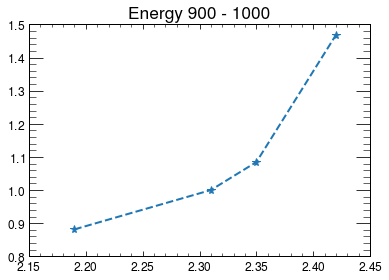

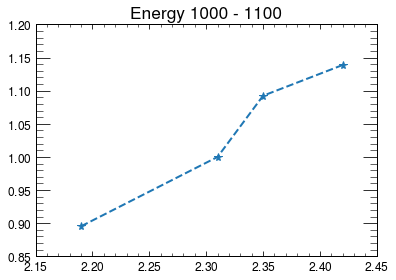

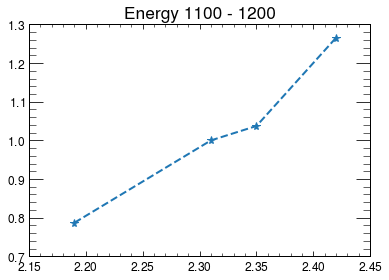

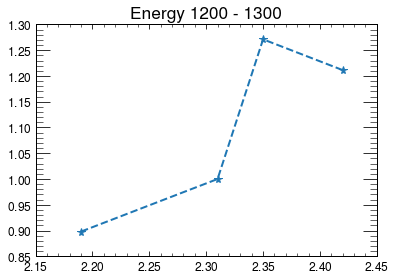

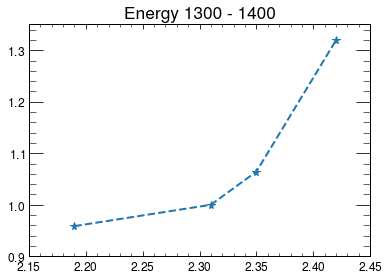

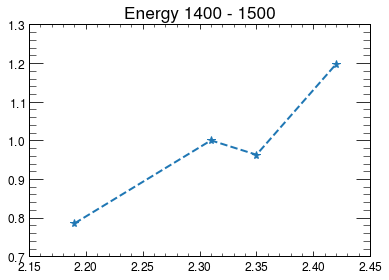

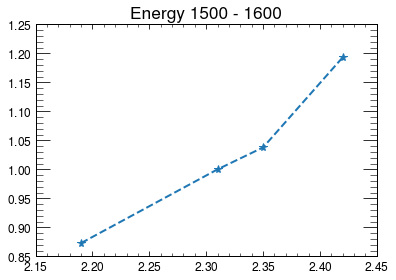

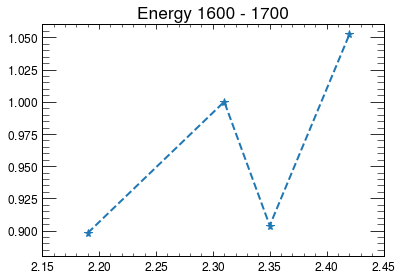

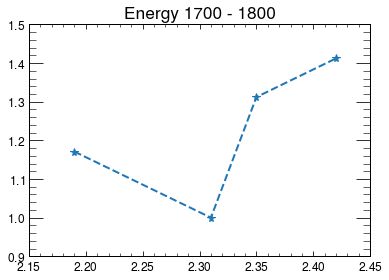

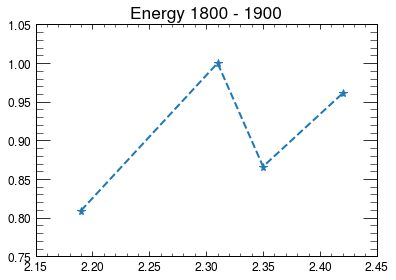

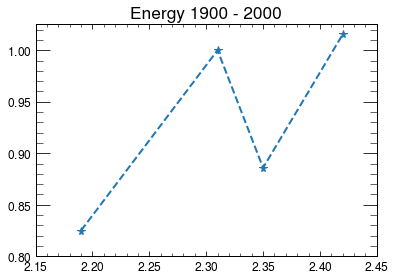

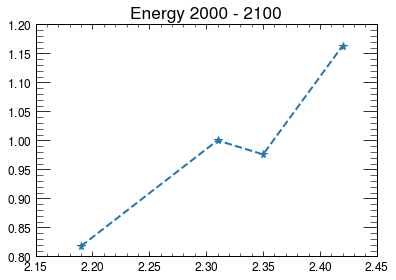

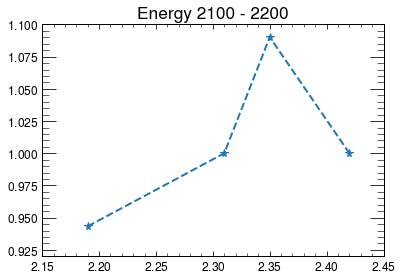

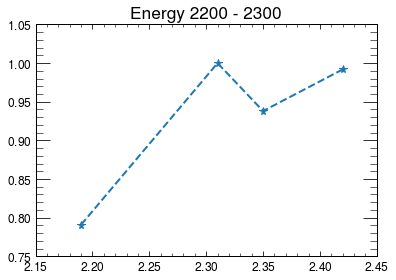

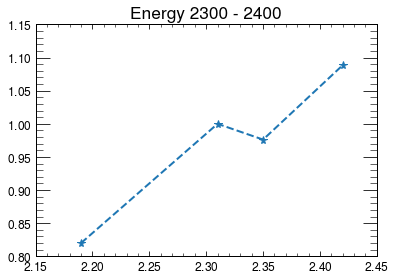

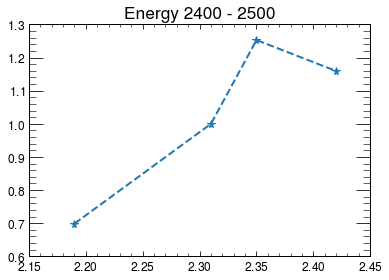

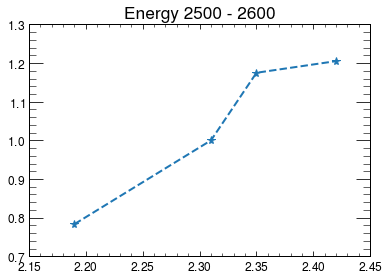

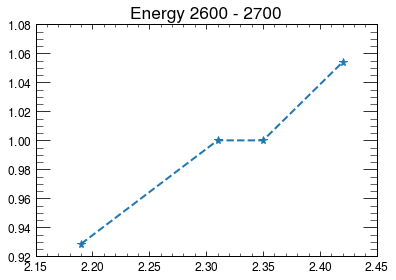

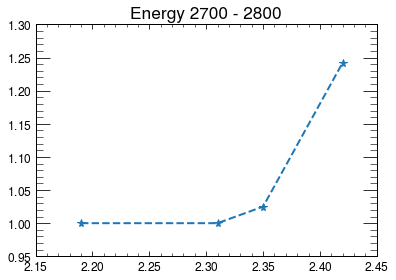

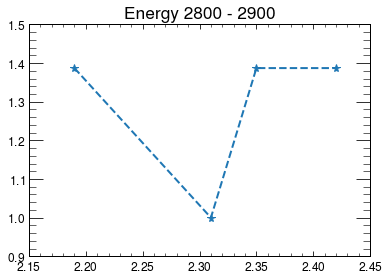

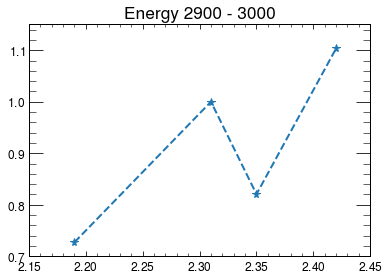

In [28]:
a219 = h["5pct219_250",:].counts()[2:]
a231 = h["5pct231_250",:].counts()[2:]
a235 = h["5pct235_250",:].counts()[2:]
a242 = h["5pct242_250",:].counts()[2:]
y_all = [a231/a219, a231/a231, a231/a235, a231/a242]
for i in range(len(y_all[0])):
    y = [y_all[0][i], y_all[1][i],y_all[2][i],y_all[3][i]]
    plt.figure()
    plt.title("Energy %d - %d" % (100*i + 200, 100*(i+1) +200))
    plt.plot(x,y, "*--")
